### dataset

link: https://drive.google.com/file/d/1bJi7nrx0QjarWa7ytYtMxlhu1cNyuvhe/view?usp=classroom_web&authuser=0

Columns:

order_id – unique order identifier

customer_id – unique customer identifier

country – customer country

product_category – category of purchased product

unit_price – price per unit

quantity – number of units purchased

discount – discount percentage (0–30)

order_date – date of purchase

delivery_days – number of days for delivery

### Task 1: Data Loading

1. Load the dataset.
2. Display the first 10 rows of the dataset.
3. Print the shape of the dataset.
4. Display column names and data types.
5. Check for missing values in each column.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("online_retail_sales - online_retail_sales.csv")
df.head(10)

,order_id,customer_id,country,product_category,unit_price,quantity,discount,order_date,delivery_days
0,10001,2102,UK,Toys,92.35,7,25,2023-08-27,7
1,10002,2435,Netherlands,Books,118.63,1,10,2023-11-20,12
2,10003,2270,UK,Clothing,108.65,3,15,2023-10-23,12
3,10004,2106,Italy,Books,79.94,5,15,2023-07-06,12
4,10005,2071,UK,Toys,41.12,5,10,2023-07-27,11
5,10006,2020,Spain,Toys,34.25,6,20,2023-08-08,1
6,10007,2121,Spain,Home,99.21,1,30,2023-07-09,3
7,10008,2466,France,Clothing,106.18,1,10,2023-12-12,12
8,10009,2214,Germany,Toys,65.43,7,20,2023-10-11,11
9,10010,2330,Germany,Home,33.10,1,5,2023-12-18,4


In [4]:
df.shape

(800, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          800 non-null    int64  
 1   customer_id       800 non-null    int64  
 2   country           800 non-null    object 
 3   product_category  800 non-null    object 
 4   unit_price        800 non-null    float64
 5   quantity          800 non-null    int64  
 6   discount          800 non-null    int64  
 7   order_date        800 non-null    object 
 8   delivery_days     800 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 56.4+ KB


In [6]:
df.isna().sum()

order_id            0
customer_id         0
country             0
product_category    0
unit_price          0
quantity            0
discount            0
order_date          0
delivery_days       0
dtype: int64

### Task 2: Basic Data Cleaning

1. Check whether there are duplicate order_id values.
2. Remove duplicate records if any exist.
3. Ensure that discount values are between 0 and 30.
4. Verify that quantity and unit_price are positive.
5. Any anomalies you find.(optional)

In [7]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [order_id, customer_id, country, product_category, unit_price, quantity, discount, order_date, delivery_days]
Index: []


In [8]:
print("Min discount: ", df["discount"].min())
print("Max discount: ", df["discount"].max())

Min discount:  0
Max discount:  30


In [9]:
print("Min quantity: ", df["quantity"].min())
print("Min unit_price: ", df["unit_price"].min())

Min quantity:  1
Min unit_price:  5.02


### Task 3: Descriptive Statistics

1. Compute mean, median, and standard deviation for unit_price, quantity, and delivery_days.
2. Find the minimum and maximum delivery time.
3. Group the data by country and calculate the average unit price.
4. Group the data by product_category and compute total quantity sold.

In [10]:
print("Mean for unit_price: ", df["unit_price"].mean())
print("Median for unit_price: ", df["unit_price"].median())
print("Standard deviation for unit_price: ", df["unit_price"].std())

print("")

print("Mean for quantity: ", df["quantity"].mean())
print("Median for quantity: ", df["quantity"].median())
print("Standard deviation for quantity: ", df["quantity"].std())

print("")

print("Mean for delivery_days: ", df["delivery_days"].mean())
print("Median for delivery_days: ", df["delivery_days"].median())
print("Standard deviation for delivery_days: ", df["delivery_days"].std())

Mean for unit_price:  63.7611625
Median for unit_price:  65.63499999999999
Standard deviation for unit_price:  33.49358339195936

Mean for quantity:  3.92375
Median for quantity:  4.0
Standard deviation for quantity:  2.0262201009198666

Mean for delivery_days:  7.355
Median for delivery_days:  7.0
Standard deviation for delivery_days:  4.053024643516394


In [11]:
print("Min delivery_days: ", df["delivery_days"].min())
print("Max delivery_days: ", df["delivery_days"].max())

Min delivery_days:  1
Max delivery_days:  14


In [12]:
priceAvgCountry = df.groupby("country")["unit_price"].mean()
print(priceAvgCountry)

country
France         65.957438
Germany        58.455338
Italy          70.658506
Netherlands    64.769500
Spain          60.058119
UK             64.240288
Name: unit_price, dtype: float64


In [13]:
df["country"].unique()

array(['UK', 'Netherlands', 'Italy', 'Spain', 'France', 'Germany'],
      dtype=object)

In [14]:
quantSumProd = df.groupby("product_category")["quantity"].sum()
print(quantSumProd)

product_category
Books          644
Clothing       625
Electronics    585
Home           565
Toys           720
Name: quantity, dtype: int64


In [15]:
df["product_category"].unique()

array(['Toys', 'Books', 'Clothing', 'Home', 'Electronics'], dtype=object)

### Task 4: Data Visualization

1. Plot a histogram of unit_price.
2. Create a boxplot of delivery_days by country.
3. Plot a scatter plot of unit_price vs quantity.
4. Create a bar chart showing total sales quantity by product_category.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

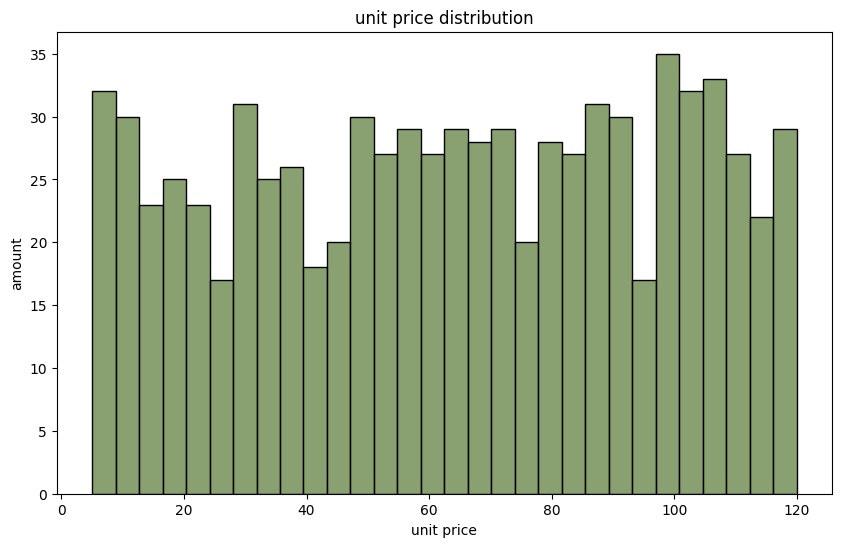

In [17]:
unitPrice = df["unit_price"]

plt.figure(figsize=(10, 6))
sns.histplot(unitPrice, bins=30, color="#628141")
plt.title("unit price distribution")
plt.xlabel("unit price")
plt.ylabel("amount")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14760\2442763108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='delivery_days', y='country', palette='pastel')


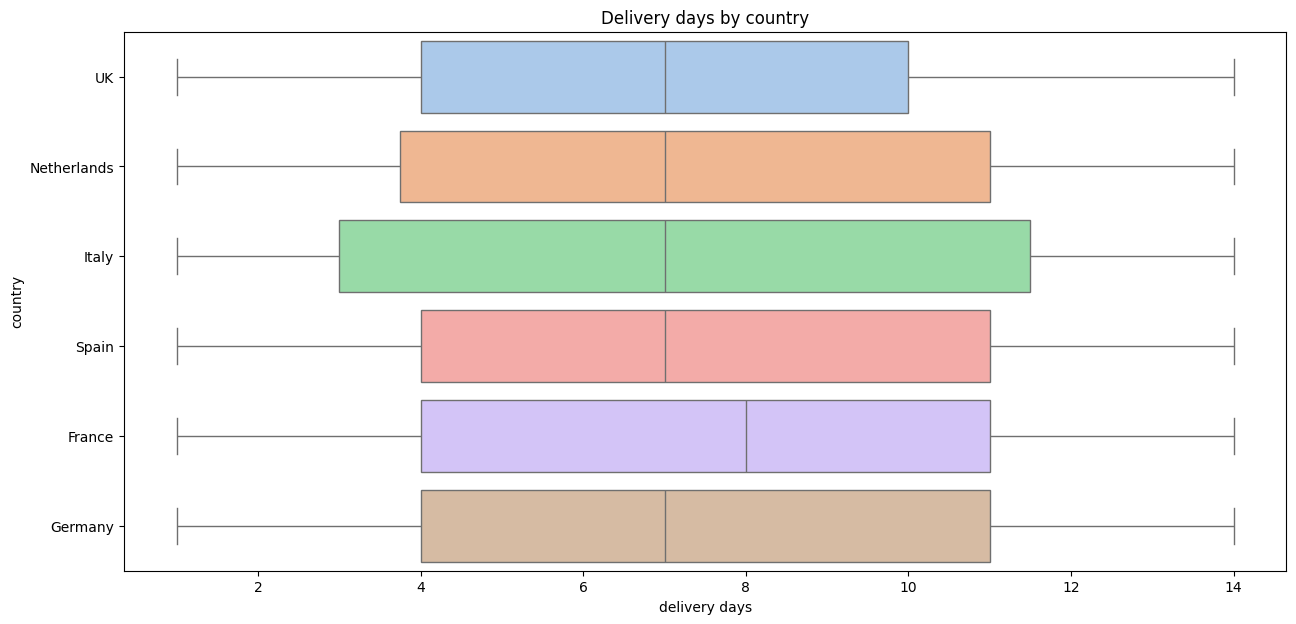

In [18]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='delivery_days', y='country', palette='pastel')
plt.title("Delivery days by country")
plt.xlabel("delivery days")
plt.ylabel("country")
plt.show()

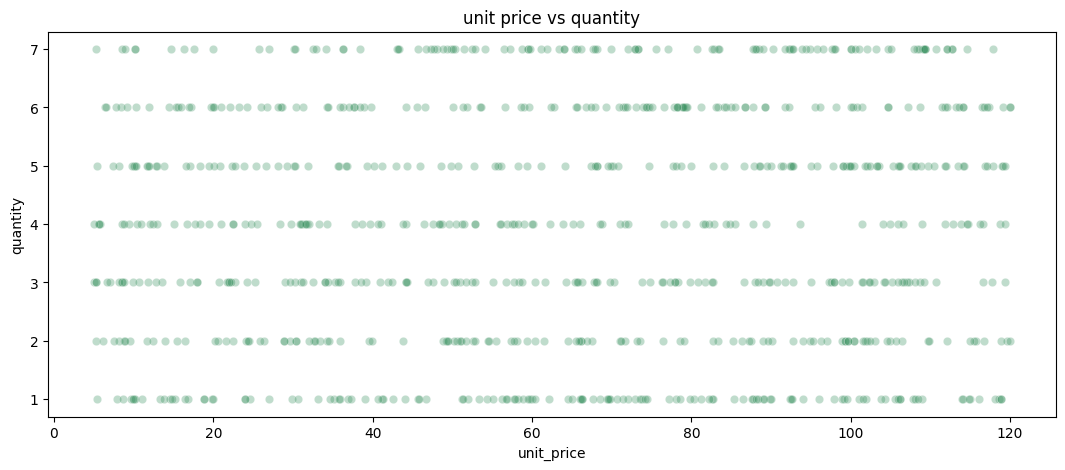

In [19]:
plt.figure(figsize=(13, 5))
sns.scatterplot(data=df, x='unit_price', y='quantity', alpha=0.3, color='seagreen')
plt.title("unit price vs quantity")
plt.xlabel("unit_price")
plt.ylabel("quantity")
plt.show()

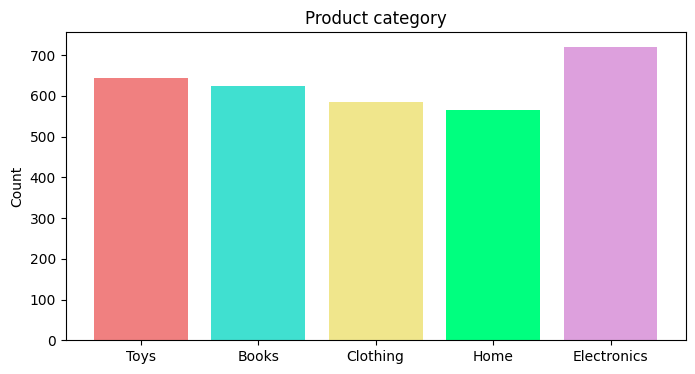

In [20]:
y = df["product_category"].unique()
x = df.groupby("product_category")["quantity"].sum()

colors = ["lightcoral", "turquoise", "khaki", "springgreen", "plum"]

plt.figure(figsize=(8,4))
plt.bar(y, x, color=colors)
plt.title("Product category")
plt.ylabel("Count")

plt.show()

### Task 5: Feature Engineering

1. Create a new feature called total_revenue:
total_revenue = unit_price * quantity * (1 - discount / 100)
2. Create a feature order_month extracted from order_date.
3. Create a binary feature fast_delivery:
    - 1 if delivery_days ≤ 5
    - 0 otherwise
4. Encode the product_category column using an appropriate encoding method.

In [21]:
df["total_revenue"] = df.apply(lambda row: row.unit_price*row.quantity*(1-row.discount / 100), axis=1)
df.head()

,order_id,customer_id,country,product_category,unit_price,quantity,discount,order_date,delivery_days,total_revenue
0,10001,2102,UK,Toys,92.35,7,25,2023-08-27,7,484.8375
1,10002,2435,Netherlands,Books,118.63,1,10,2023-11-20,12,106.7670
2,10003,2270,UK,Clothing,108.65,3,15,2023-10-23,12,277.0575
3,10004,2106,Italy,Books,79.94,5,15,2023-07-06,12,339.7450
4,10005,2071,UK,Toys,41.12,5,10,2023-07-27,11,185.0400


In [22]:
df["order_month"] = pd.to_datetime(df['order_date']).dt.month
df.head()

,order_id,customer_id,country,product_category,unit_price,quantity,discount,order_date,delivery_days,total_revenue,order_month
0,10001,2102,UK,Toys,92.35,7,25,2023-08-27,7,484.8375,8
1,10002,2435,Netherlands,Books,118.63,1,10,2023-11-20,12,106.7670,11
2,10003,2270,UK,Clothing,108.65,3,15,2023-10-23,12,277.0575,10
3,10004,2106,Italy,Books,79.94,5,15,2023-07-06,12,339.7450,7
4,10005,2071,UK,Toys,41.12,5,10,2023-07-27,11,185.0400,7


In [23]:
df["fast_delivery"] = [1 if x <= 5 else 0 for x in df["delivery_days"]]
df.head()

,order_id,customer_id,country,product_category,unit_price,quantity,discount,order_date,delivery_days,total_revenue,order_month,fast_delivery
0,10001,2102,UK,Toys,92.35,7,25,2023-08-27,7,484.8375,8,0
1,10002,2435,Netherlands,Books,118.63,1,10,2023-11-20,12,106.7670,11,0
2,10003,2270,UK,Clothing,108.65,3,15,2023-10-23,12,277.0575,10,0
3,10004,2106,Italy,Books,79.94,5,15,2023-07-06,12,339.7450,7,0
4,10005,2071,UK,Toys,41.12,5,10,2023-07-27,11,185.0400,7,0


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
productTypes = df["product_category"]

le = LabelEncoder()
df["product_category"] = le.fit_transform(productTypes)
df["product_category"]

0      4
1      0
2      1
3      0
4      4
      ..
795    0
796    2
797    4
798    1
799    3
Name: product_category, Length: 800, dtype: int64

In [26]:
df.head()

,order_id,customer_id,country,product_category,unit_price,quantity,discount,order_date,delivery_days,total_revenue,order_month,fast_delivery
0,10001,2102,UK,4,92.35,7,25,2023-08-27,7,484.8375,8,0
1,10002,2435,Netherlands,0,118.63,1,10,2023-11-20,12,106.7670,11,0
2,10003,2270,UK,1,108.65,3,15,2023-10-23,12,277.0575,10,0
3,10004,2106,Italy,0,79.94,5,15,2023-07-06,12,339.7450,7,0
4,10005,2071,UK,4,41.12,5,10,2023-07-27,11,185.0400,7,0


### Task 6: Correlation Analysis

1. Compute the correlation matrix for numerical features.
2. Visualize the correlation matrix using a heatmap.
3. Identify the two features most correlated with total_revenue.

In [27]:
numeric_cols = df.select_dtypes(include=["number"])
numeric_cols

,order_id,customer_id,product_category,unit_price,quantity,discount,delivery_days,total_revenue,order_month,fast_delivery
0,10001,2102,4,92.35,7,25,7,484.8375,8,0
1,10002,2435,0,118.63,1,10,12,106.7670,11,0
2,10003,2270,1,108.65,3,15,12,277.0575,10,0
3,10004,2106,0,79.94,5,15,12,339.7450,7,0
4,10005,2071,4,41.12,5,10,11,185.0400,7,0
...,...,...,...,...,...,...,...,...,...,...
795,10796,2138,0,35.92,2,20,1,57.4720,8,1
796,10797,2510,2,77.27,3,25,5,173.8575,5,1
797,10798,2258,4,60.41,1,5,2,57.3895,10,1
798,10799,2009,1,46.60,6,25,14,209.7000,12,0


In [28]:
matrix = numeric_cols.corr()
print("Correlation matrix is: ")
print(matrix)

Correlation matrix is: 
                  order_id  customer_id  product_category  unit_price  \
order_id          1.000000    -0.042617          0.019500    0.036122   
customer_id      -0.042617     1.000000         -0.018683    0.063581   
product_category  0.019500    -0.018683          1.000000    0.037235   
unit_price        0.036122     0.063581          0.037235    1.000000   
quantity          0.068932     0.001521          0.030588    0.052066   
discount         -0.032945    -0.023395         -0.030457    0.007064   
delivery_days    -0.032682    -0.073031          0.004062   -0.019891   
total_revenue     0.081595     0.034901          0.047541    0.662452   
order_month      -0.054952     0.038008         -0.041154    0.007116   
fast_delivery     0.019725     0.080214         -0.004948    0.005766   

                  quantity  discount  delivery_days  total_revenue  \
order_id          0.068932 -0.032945      -0.032682       0.081595   
customer_id       0.001521 -0.02

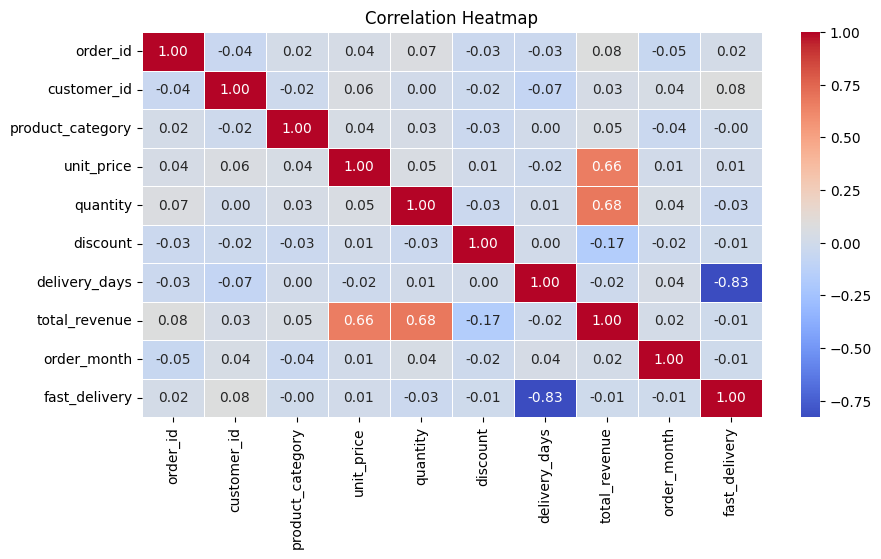

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

the 2 features most correlated with total_revenue are unit_price and qunatity

- No Correlation: A correlation value of 0 means no linear relationship between the variables. As one changes, the other does not follow any predictable pattern.
- Positive Correlation: A value closer to +1 indicates a direct relationship as one variable increases, the other also increases. Example: height and weight.
- Negative Correlation: A value closer to -1 indicates an inverse relationship as one variable increases, the other decreases. Example: speed and travel time.

### Task 7: Train–Test Split


1. Define the target variable as total_revenue.
2. Select appropriate input features.
3. Split the dataset into training and testing sets (80/20).

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
y = df["total_revenue"]
X = df.drop(columns=["order_id", "customer_id", "country", "order_date", "delivery_days", "total_revenue"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Task 8: Regression Modeling

1. Train a Linear Regression model to predict total_revenue.
2. Evaluate the model using:
    - Mean Absolute Error (MAE)
    - Mean Squared Error (MSE)
    - R² score

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [33]:
lr = LinearRegression().fit(X_train, y_train)
ypred_tr_lr = lr.predict(X_train)
ypred_ts_lr = lr.predict(X_test)

In [34]:
summary = pd.DataFrame({
    "Models": ["R²", "MSE", "MAE"],
    "test": [
        r2_score(y_test, ypred_ts_lr), 
        mean_squared_error(y_test, ypred_ts_lr), 
        mean_absolute_error(y_test, ypred_ts_lr)],
    "train": [
        r2_score(y_train, ypred_tr_lr),
        mean_squared_error(y_train, ypred_tr_lr),
        mean_absolute_error(y_train, ypred_tr_lr)]
})

print(summary)

  Models         test        train
0     R²     0.894618     0.883028
1    MSE  3400.623234  3583.230576
2    MAE    42.869391    44.379559


- MAE of 42.869391 (test) and 44.379559 (train) means that, on average, the model's predictions are approximately 42.869391 (in a test) and 44.379559 (in a train) away from the true y value.
- MSE of 3400.623234 (test) and 3583.230576 (train) means, on average, the squared prediction errors are approximately 3400.623234 (test) and 3583.230576 (train).
- An R² of 0.894618 (test) and 0.883028 (train) indicates that the model can explain approximately 89.46% (test) and 88.3% (train) of the variance in y values.

### Explain how feature scaling could affect model performance.

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
linReg = LinearRegression().fit(X_train_scaled, y_train)
ypred_tr_lr2 = linReg.predict(X_train_scaled)
ypred_ts_lr2 = linReg.predict(X_test_scaled)

In [37]:
summary2 = pd.DataFrame({
    "Models": ["R²", "MSE", "MAE"],
    "test": [
        r2_score(y_test, ypred_ts_lr2), 
        mean_squared_error(y_test, ypred_ts_lr2), 
        mean_absolute_error(y_test, ypred_ts_lr2)],
    "train": [
        r2_score(y_train, ypred_tr_lr2),
        mean_squared_error(y_train, ypred_tr_lr2),
        mean_absolute_error(y_train, ypred_tr_lr2)]
})

print(summary)

  Models         test        train
0     R²     0.894618     0.883028
1    MSE  3400.623234  3583.230576
2    MAE    42.869391    44.379559


In [38]:
print(summary)

  Models         test        train
0     R²     0.894618     0.883028
1    MSE  3400.623234  3583.230576
2    MAE    42.869391    44.379559


standardization didn't affect, the results are same. the reason is the model calculates each feature's individual contribution to the target